In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
data = pd.read_csv("ShoniData.csv")

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
test_set = pd.read_csv("test_data.csv")


In [3]:
play_data = data[0:270000].copy() #get some data messwith, we can get more data to train our models later
test = data[270100:270200]
#remove elements were a value is unkown
#alternatively we could replace is by a random value but that could be attempted later
play_data = play_data.drop(play_data[play_data.age_band_of_driver == -1].index)
play_data = play_data.drop(play_data[play_data.number_of_vehicles == -1].index)
play_data = play_data.drop(play_data[play_data.weather_conditions == -1].index)
play_data = play_data.drop(play_data[play_data.age_band_of_driver == -1].index)
play_data = play_data.drop(play_data[play_data.first_point_of_impact == -1].index)
play_data = play_data.drop(play_data[play_data.road_type == -1].index)

#print (test)
test = test.drop(test[test.age_band_of_driver == -1].index)
test = test.drop(test[test.number_of_vehicles == -1].index)
test = test.drop(test[test.weather_conditions == -1].index)
test = test.drop(test[test.age_band_of_driver == -1].index)
test = test.drop(test[test.first_point_of_impact == -1].index)
test = test.drop(test[test.road_type == -1].index)

a = play_data.reset_index()
play_data = a
b = test.reset_index()
test = b

X = play_data[["speed_limit","weather_conditions","number_of_vehicles",
               "road_type","accident_severity","day_of_week"]]

Xtest = test[["speed_limit","weather_conditions","number_of_vehicles",
               "road_type","accident_severity","day_of_week"]]

Xtest_set = test_set[["Speed_limit","Weather_Conditions","Number_of_Vehicles",
              "Road_Type","Accident_Severity","Day_of_Week"]]
#return the accident refernce so that we can later identify the correct y's


#this is the y variable
Y = play_data["number_of_casualties"] #casualties is our interest variable Y
Ytest = test["number_of_casualties"]


#Ysev = play_data["casualty_severity"] #casualties is our interest variable Y
#Ysev_test = test["casualty_severity"]
#Ysev = Ysev.drop(Ysev[Ysev== -1].index)

#have to prepare the data to be fed into a classifier
#we need an X sample data
#the goal is to take X and unpack all categories into single binary categories
def binarize(N,array):
    l = len(array)
    B = np.zeros((l,N))
    index = range(l)
    array.dtype = int
    
    B[index,array-1] = 1
    return B


X = np.asarray(X)
X = X.astype(int)
speed = X[:,0]
speed = speed / 10
speed = speed.astype(int)
weather = X[:,1]
weather = weather.astype(int)
vehicle = X[:,2]
road_type = X[:,3]
a_severity = X[:,4]
day = X[:,5]
weather = binarize(9,weather)
speed = binarize(7,speed)
vehicle.shape = (-1,1)
road_type = binarize(9,road_type)
a_severity = binarize(3,a_severity)
day = binarize(7,day)

A = np.hstack((weather,speed,vehicle,road_type,a_severity,day))
A = A.astype(int)
tempX = A

X = np.asarray(Xtest)
X = X.astype(int)
speed = X[:,0]
speed = speed / 10
speed = speed.astype(int)
weather = X[:,1]
weather = weather.astype(int)
vehicle = X[:,2]
road_type = X[:,3]
a_severity = X[:,4]
day = X[:,5]
weather = binarize(9,weather)
speed = binarize(7,speed)
vehicle.shape = (-1,1)
road_type = binarize(9,road_type)
a_severity = binarize(3,a_severity)
day = binarize(7,day)

A = np.hstack((weather,speed,vehicle,road_type,a_severity,day))
A = A.astype(int)
Xtest = A

X = np.asarray(Xtest_set)
X = X.astype(int)
speed = X[:,0]
speed = speed / 10
speed = speed.astype(int)
weather = X[:,1]
weather = weather.astype(int)
vehicle = X[:,2]
road_type = X[:,3]
a_severity = X[:,4]
day = X[:,5]
weather = binarize(9,weather)
speed = binarize(7,speed)
vehicle.shape = (-1,1)
road_type = binarize(9,road_type)
a_severity = binarize(3,a_severity)
day = binarize(7,day)

A = np.hstack((weather,speed,vehicle,road_type,a_severity,day))
A = A.astype(int)
Xtest_set = A
X = tempX

In [8]:
y_ref = test_set["Accident_Index"]

In [6]:
from sklearn.neighbors import KNeighborsClassifier #import a Knn classifier

classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X,Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [ ]:
Ypred = classifier.predict(Xtest)

#we can plot Ytest and Ypred see how well this naive model works
index = np.arange(len(Ypred))

plt.scatter(index,Ytest, s= 100,alpha = 0.1, c = "blue",label = "Prediction")
plt.scatter(index,Ypred,s = 10, alpha = 0.7, c = "red", label = "Test Data")
#270000 training points
#100 testing points

plt.grid()
plt.xlabel("Sample Number")
plt.ylabel("Number of Casualties")
plt.legend()

score = sklearn.metrics.accuracy_score(Ytest, Ypred)
score

plt.savefig("knn_270000_100.pdf")

In [4]:
from sklearn.ensemble.forest import RandomForestClassifier

#Create the model with 100 trees

model = RandomForestClassifier(n_estimators = 100)

#Now fit this Random Forest on the training data:
model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

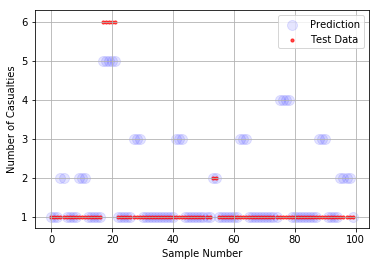

In [7]:
Ypred = model.predict(Xtest)

index = np.arange(len(Ypred))


plt.scatter(index,Ytest, s= 100,alpha = 0.1, c = "blue",label = "Prediction")
plt.scatter(index,Ypred,s = 10, alpha = 0.7, c = "red", label = "Test Data")
#270000 training points
#100 testing points

plt.grid()
plt.xlabel("Sample Number")
plt.ylabel("Number of Casualties")
plt.legend()

score = sklearn.metrics.accuracy_score(Ytest, Ypred)
score

plt.savefig("random_forest_binary_270000_100.pdf")

In [16]:
Ypred_final = model.predict(Xtest_set)
y_ref = np.asarray(y_ref)

Ypred_final = np.asarray(Ypred_final)

Ypred_final.shape = (-1,1)
y_ref.shape = (-1,1)


A = np.hstack((y_ref,Ypred_final))
savedata = pd.DataFrame(A)
savedata.to_csv("GNTM_y_predictions.csv")